In [ ]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import optimizers



4423680/4422102 [==============================] - 0s 0us/step


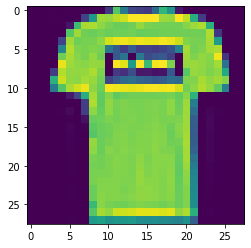

In [ ]:
#Loading the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
plt.imshow(x_train[1])



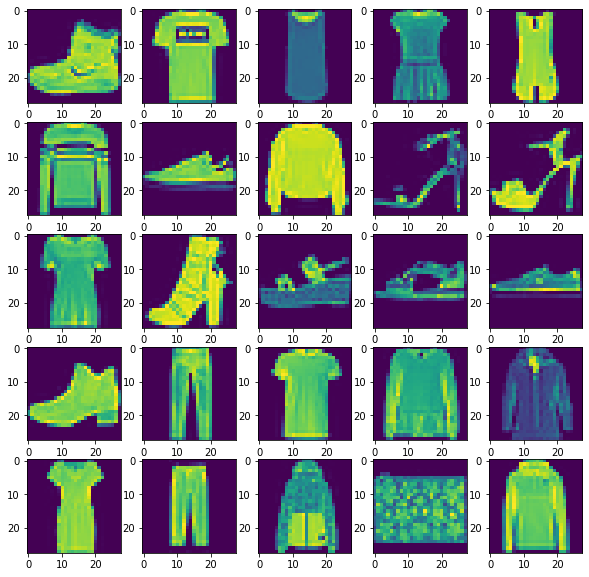

In [ ]:
#TrainingSet
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
plt.show()

In [ ]:
# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1,784]), x_test.reshape([-1,784])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

In [ ]:
class_name=['T-shirt/top','Trouser/pants','Pullover','Dress', 'Coat','Sandal','Shirt','Sneaker', 'Bag','Ankle boot']


In [ ]:
train_data= tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data= train_data.shuffle(60000)
train_data= train_data.batch(batch_size=100)

In [ ]:
# Network Parameters
n_hidden_1 = 128 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 classes)

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random.normal([n_hidden_1])),
    'b2': tf.Variable(tf.random.normal([n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_classes]))
}

In [ ]:
# Create model
def multilayer_perceptron(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    layer_2 = tf.nn.sigmoid(layer_2)
    output = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
    return tf.nn.sigmoid(output)

In [ ]:
#Loss function 
def compute_loss(true_y, pred):
    loss= tf.keras.losses.sparse_categorical_crossentropy(true_y,pred)
    return tf.reduce_sum(loss)
#accuracy
def compute_accuracy(true_y, pred):
    true_y=tf.one_hot(true_y,10)
    acc=tf.keras.metrics.categorical_accuracy(true_y,pred)
    return tf.reduce_mean(acc)


In [ ]:
optimizers.Adam()
optimizer = tf.keras.optimizers.Adam(0.001)

In [ ]:
for epoch in range(20):
    for step, (batch_x,batch_y) in enumerate(train_data):
        with tf.GradientTape() as tape:
             pred= multilayer_perceptron(batch_x)
             loss= compute_loss(batch_y,pred)
        grads= tape.gradient(loss, list(weights.values())+ list(biases.values()))
        optimize= optimizer.apply_gradients(zip(grads,list(weights.values())+ list(biases.values())))
        accuracy=compute_accuracy(batch_y,pred)
        print('=> epoch:%d,step:%d,accuracy:%.3f, loss:%.3f'%(epoch+1, step,accuracy.numpy(),loss.numpy()))

Streaming output truncated to the last 5000 lines.
=> epoch:12,step:400,accuracy:0.920, loss:26.467
=> epoch:12,step:401,accuracy:0.900, loss:26.611
=> epoch:12,step:402,accuracy:0.890, loss:31.340
=> epoch:12,step:403,accuracy:0.910, loss:26.790
=> epoch:12,step:404,accuracy:0.870, loss:29.029
=> epoch:12,step:405,accuracy:0.850, loss:30.528
=> epoch:12,step:406,accuracy:0.840, loss:34.530
=> epoch:12,step:407,accuracy:0.870, loss:36.488
=> epoch:12,step:408,accuracy:0.940, loss:21.605
=> epoch:12,step:409,accuracy:0.900, loss:30.949
=> epoch:12,step:410,accuracy:0.880, loss:24.817
=> epoch:12,step:411,accuracy:0.890, loss:30.855
=> epoch:12,step:412,accuracy:0.860, loss:32.069
=> epoch:12,step:413,accuracy:0.910, loss:31.752
=> epoch:12,step:414,accuracy:0.850, loss:41.915
=> epoch:12,step:415,accuracy:0.820, loss:41.786
=> epoch:12,step:416,accuracy:0.850, loss:44.025
=> epoch:12,step:417,accuracy:0.800, loss:50.690
=> epoch:12,step:418,accuracy:0.830, loss:38.166
=> epoch:12,step:4

In [ ]:
prediction = multilayer_perceptron(x_test)

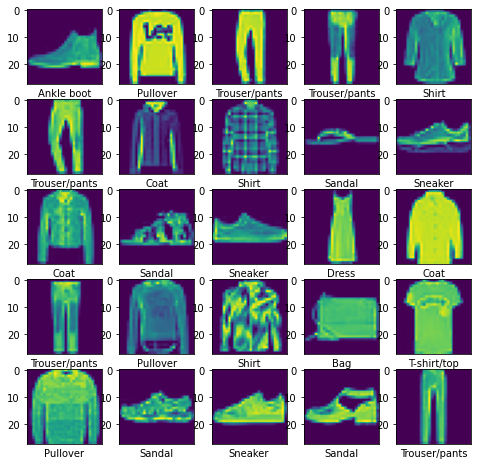

In [ ]:
#Prediction on testset
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.xlabel(class_name[np.argmax(prediction[i].numpy())])
    plt.xticks([])
plt.show()